In [259]:
%run -i earthquake_predictor.ipynb
earthquake_predictor = EarthquakePredictor('database.csv')

In [260]:
earthquake_predictor.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [261]:
earthquake_predictor.display_whole_tab()

             Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23367  12/08/2016  05:15:05   43.8229    86.3451  Earthquake   17.55   
23368  12/08/2016  14:49:46   40.4535  -126.1936  Earthquake    8.45   
23369  12/08/2016  17:38:46  -10.6787   161.3214  Earthquake   40.00   
23370  12/08/2016  17:46:24  -10.2234   161.0792  Earthquake   35.00   
23371  12/08/2016  21:48:34  -10.8691   161.2302  Earthquake   27.20   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0     

In [262]:
earthquake_predictor.check_missing_values()

True


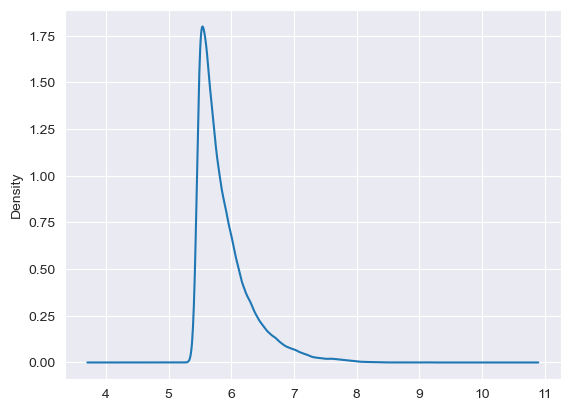

In [263]:
earthquake_predictor.display_data_distribution()

In [264]:
columns_to_remove = ['Time', 'Type', 'Magnitude Error', 'Date', 'Depth Error', 'Depth Seismic Stations',
                     'Magnitude Type', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
                     'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source',
                     'Status']
earthquake_predictor.remove_not_needed_columns(columns_to_remove)

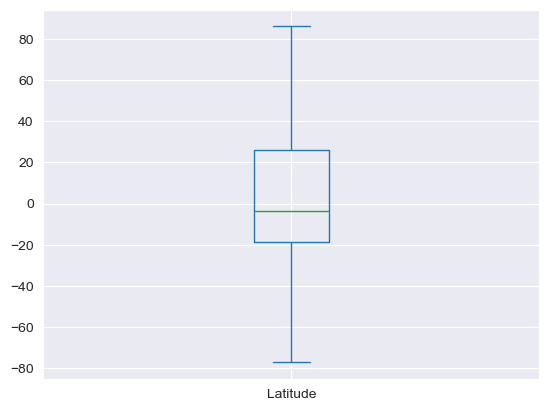

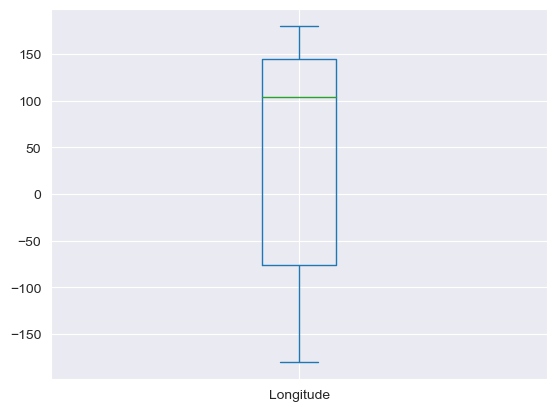

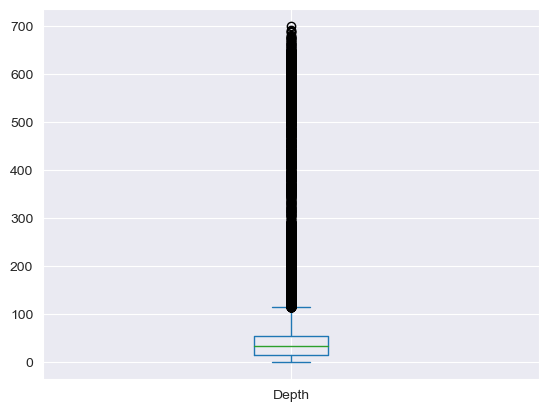

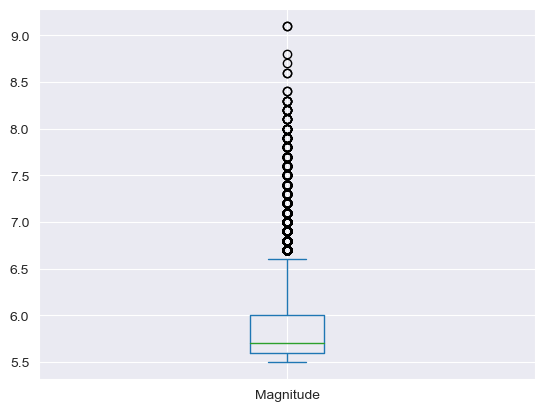

In [265]:
earthquake_predictor.display_box_plots()

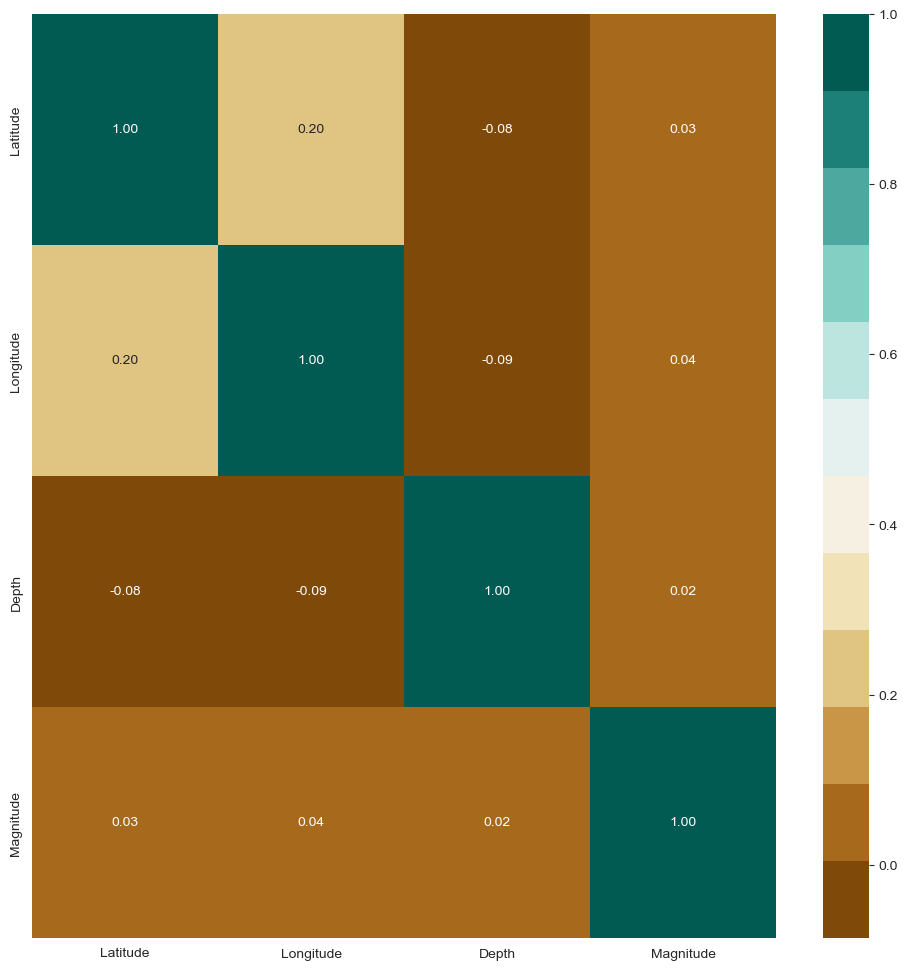

In [266]:
earthquake_predictor.display_correlation_matrix()

In [267]:
earthquake_predictor.train_linear_regression()

In [268]:
earthquake_predictor.train_random_forest(n_estimators=100, random_state=0, model_name='Random Forest (Default)')

Random Forest (Default): RMSE = 0.4522423903196194, MAE = 0.3319570022777424


In [269]:
earthquake_predictor.train_random_forest(n_estimators=10, random_state=0, model_name='Random Forest (Adjusted)')

Random Forest (Adjusted): RMSE = 0.4644080994094686, MAE = 0.33894415972667097


In [270]:
earthquake_predictor.train_gradient_boosting()

Gradient Boosting: RMSE = 0.42258840597006886, MAE = 0.3156997507956259


In [271]:
earthquake_predictor.train_decision_tree()

Decision Tree: RMSE = 0.5953038870323845, MAE = 0.4117830450565877


In [272]:
earthquake_predictor.train_adaboost(n_estimators=100, learning_rate=0.5, loss='square', random_state=42)


AdaBoost: RMSE = 0.9084691482594268, MAE = 0.8410956865977723


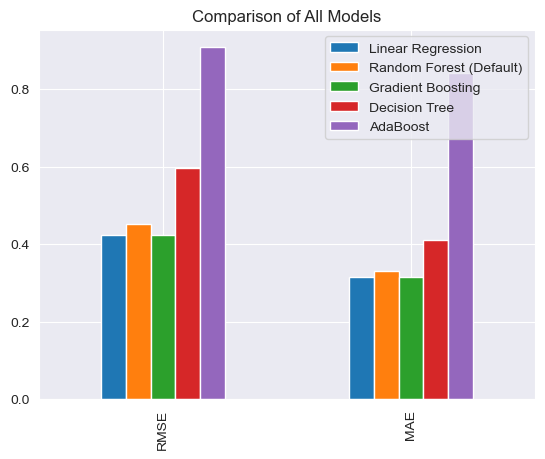

In [273]:
compare_all = earthquake_predictor.compare_models()
df_compare_all.plot(kind='bar', title='Comparison of All Models')
plt.show()